In [1]:
from analysis import *

from astropy.io import fits
from lightkurve.correctors import SFFCorrector, PLDCorrector
from astropy.convolution import convolve, Box1DKernel
import richardsplot


In [2]:
#from utilities.containers import *

ModuleNotFoundError: No module named 'downloads'

In [5]:
from analysis import *
import h5py
from astropy.convolution import convolve, Box1DKernel
import sys


channel = 55

campaign = 16
mod,submod = get_submod(channel)
submod-=1 # submods are 0-3 in the hdf5 file

    #hdf5_file = "/Users/rachelbuttry/K2/K2C%s_target_pixels.hdf5"%campaign
hdf5_file = "/home/jackeline/Dropbox/Kepler/K2PixelMap_c16.hdf5"

    #hdf5_file = "/home/rachel/Research/K2/K2C%s_target_pixels.hdf5"%campaign
    # there are 3894 cadence points in c16
cadences = 3894
time = np.arange(cadences)/48.0

with h5py.File(hdf5_file, 'r') as f:
    channel_epics = np.array(list(f['%s/%s/%s'%(campaign, mod,submod)].keys()))# look at objects in given channel).astype(int)

    # need the kepler magnitudes
all_targets = pd.read_csv("/home/jackeline/Research/k2_pipeline/K2_official_targets/K2Campaign%stargets.csv"%campaign, skipinitialspace=True)

# saving lcs to take the median
arr = []

with h5py.File(hdf5_file, 'r') as f:
    channel_epics = np.array(list(f['%s/%s/%s'%(campaign, mod, submod)].keys()))# look at objects in given channel).astype(int)

    rel_epics = channel_epics[np.isin(channel_epics, all_targets['EPIC ID'][np.logical_and(all_targets['magnitude'] > 13, all_targets['magnitude'] < 20)])]
        #print(len(rel_epics))

        # loop thru the objects
    for epic in rel_epics:
        d = np.array(f['%s/%s/%s/%s'%(campaign, mod, submod, epic)]['data'])
        lc_hdf5 = np.nansum(np.nansum(d, axis=1), axis=1)

            # handle spurious cadences
        lc = lk.LightCurve(time, flux=lc_hdf5)

        
        _, spurious_cad = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
        lc_raw = lc.flux

            # interpolate
        cadno = np.arange(len(lc_raw)) # get an array to serve as our time/cadence measurement
        interped_vals = np.interp(cadno[spurious_cad], cadno[~spurious_cad], lc_raw[~spurious_cad])
        # replace spurious cadence values with the interpolated values
        lc_raw[spurious_cad] = interped_vals
        norm = np.std(lc_raw)
        lc_raw -= np.mean(lc_raw)
        lc_raw = lc_raw/norm

        smooth = convolve(lc_raw, Box1DKernel(350), boundary='extend')

        arr.append(lc_raw)

AttributeError: 'LightCurve' object has no attribute 'row'

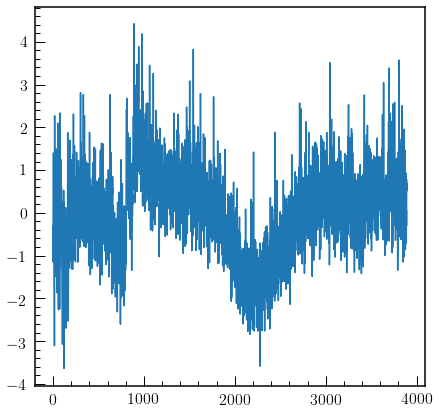

In [4]:
plt.plot(arr[0])

In [8]:
rel_epics = channel_epics[np.isin(channel_epics, all_targets['EPIC ID'][np.logical_and(all_targets['magnitude'] > 13, all_targets['magnitude'] < 20)])]
len(rel_epics)

226

In [11]:
epics_m2 = rel_epics
# get the pixel coords
rows = np.ones(len(epics_m2))*(-1)sort_row
cols = np.ones(len(epics_m2))*(-1)

for i, epic in enumerate(epics_m2):
    genuine_tpf = lk.search_targetpixelfile(epic, mission='K2', campaign=16).download()
    rows[i] = genuine_tpf.row
    cols[i] = genuine_tpf.column
    

sort_row = rows.argsort()
sort_col = cols.argsort()

In [77]:
epics_m2[sort_row][::3]
rows[sort_row][::3]


array([  32.,   64.,   75.,   94.,  100.,  111.,  138.,  172.,  179.,
        184.,  217.,  228.,  238.,  246.,  256.,  263.,  281.,  282.,
        291.,  295.,  298.,  318.,  339.,  348.,  356.,  377.,  397.,
        415.,  426.,  439.,  472.,  479.,  489.,  497.,  501.,  521.,
        540.,  560.,  579.,  580.,  586.,  591.,  607.,  621.,  634.,
        641.,  657.,  675.,  682.,  698.,  715.,  744.,  755.,  761.,
        770.,  774.,  792.,  803.,  808.,  831.,  844.,  856.,  860.,
        874.,  892.,  907.,  925.,  930.,  942.,  959.,  971.,  990.,
       1003., 1015., 1019., 1033.])

In [60]:


radius = np.sqrt(rows**2+cols**2)
sort_rad = np.argsort(radius)
radiusS = radius[sort_rad][::21]
epics_m20 = epics_m2[sort_rad][::21]
rows0 = rows[sort_rad][::21]
cols0 = cols[sort_rad][::21]
mags = np.arange(0, len(cols0))

In [80]:
radius = np.sqrt(rows**2+cols**2)
sort_rad = np.argsort(radius)
radiusS = radius[sort_rad][::21]
epics_m20 = epics_m2[sort_row][::3][:10]
rows0 = rows[sort_row][::3][:10]
cols0 = cols[sort_row][::3][:10]
mags = np.arange(0, len(cols0))

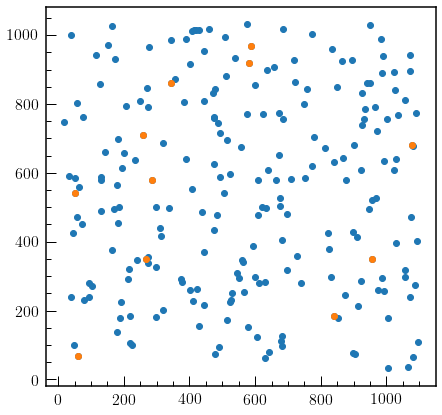

In [61]:
plt.scatter(cols[sort_rad],rows[sort_rad])
plt.scatter(cols0,rows0)

In [110]:
epics_m20 = epics_m2[IDargs][sortR][::-1] 
rows0 = rows[IDargs][sortR ][::-1]
cols0 = cols[IDargs][sortR ][::-1]
mags = all_targets.magnitude[all_targets['EPIC ID'].isin(epics_m20)].values

#mags = np.arange(0, len(cols0))

In [111]:
mags

array([15.318, 17.761, 14.715, 15.1  , 17.438, 14.609, 17.406, 14.119,
       15.981, 14.335])

251392336 91.43850392476902 919.0 582.0
251395388 440.82195952561165 721.0 970.0
251396160 543.3985645914056 711.0 258.0
251397725 645.3417699173051 607.0 639.0
251399491 756.3630080854034 541.0 51.0
251400813 859.9162749942578 427.0 897.0
251403706 927.1768979002874 291.0 373.0
251405578 1017.7116487492908 179.0 852.0
251408054 1087.7890420481353 62.0 629.0
251408252 1132.9298301307103 32.0 1006.0


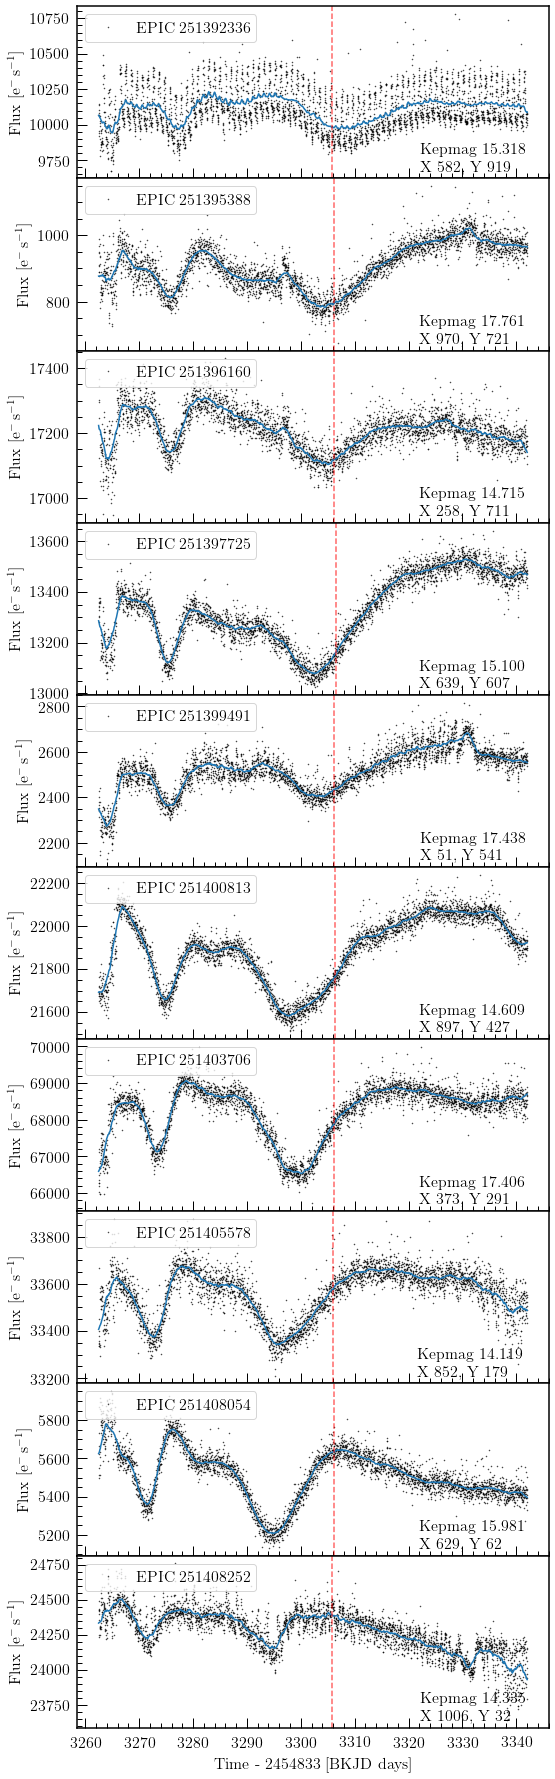

In [121]:
# FIGURE CODE HERE!

fig, ax = plt.subplots(len(epics_m20),1, figsize=(8,25), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0})
#gs1 = gridspec.GridSpec(len(epics_m2),1)
#gs1.update(wspace=0.025, hspace=0.00) # set the spacing between axes. 

sort = sort_row.copy()[::-1]

for i, epic in enumerate(epics_m20):
    print(epic, radiusS[i], rows0[i], cols0[i])
    genuine_tpf = lk.search_targetpixelfile(epic, mission='K2', campaign=16).download()
    #print(genuine_tpf.pipeline_mask.shape[0]*genuine_tpf.pipeline_mask.shape[1])
    
    # remove spurious cadencess
    cor_lc = genuine_tpf.to_lightcurve(aperture_mask="all")
    _, spurious_cadences = cor_lc.flatten().remove_outliers(return_mask=True)
    lc_clean_sff = cor_lc[~spurious_cadences]

    #subtract 372.53 day sine fit to light curves
    #lc_clean_sff.time, lc_clean_sff.flux = subtract_sine(lc_clean_sff.time, lc_clean_sff.flux)

    lc_clean_sff.plot(normalize=False, color='k', marker = '.', ls='', alpha=0.8, ax=ax[i])

    # create and plot smoothed version
    flux_smooth = convolve(lc_clean_sff.flux, Box1DKernel(100), boundary='extend')
    ax[i].plot(lc_clean_sff.time, flux_smooth)
    stdF = np.std(flux_smooth)
    ax[i].text(lc_clean_sff.time[-930], np.min(lc_clean_sff.flux), "Kepmag %.3f \n X %s, Y %s"%(mags[i], genuine_tpf.column, genuine_tpf.row), fontsize=16)

    #ax[i].plot(np.ones(2)*shifts_m2[sort][i], ax[i].get_ylim(), 'r--', alpha=0.6, label="%s days"%shifts_m2[sort][i])
    
    # plot the red line
    # mid campaign
    #middle = 0.5*(np.max(lc_clean_sff.time)- np.min(lc_clean_sff.time))+ np.min(lc_clean_sff.time)
    ax[i].plot([lc_clean_sff.time[1950],lc_clean_sff.time[1950]], ax[i].get_ylim(), 'r--', alpha=0.6)
    ax[i].margins(y=0)
    ax[i].yaxis.label.set_fontsize(16)
    ax[i].legend(loc="upper left", fontsize=16)
    if i<len(epics_m20)-1:
        ax[i].set_xlabel("")
    else:
        ax[i].xaxis.label.set_fontsize(16)
        
    #ax[i].yaxis.set_minor_locator(AutoMinorLocator())





plt.tight_layout()
plt.savefig("./fig5b.pdf")


In [104]:
sel = ["251408252","251405578","251403706","251396160","251397725","251400813", "251395388", "251408054","251392336","251399491"]
IDargs = []
for idx in sel: 
    IDargs.append(np.where(epics_m2 == idx)[0][0])


/home/jackeline/anaconda3/envs/scope_dev/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [90]:
epics_m2[IDargs]
sortR = np.argsort(rows[IDargs])

In [106]:
all_targets.magnitude[all_targets['EPIC ID'].isin(epic)].values[0]

array([15.318, 17.761, 14.715, 15.1  , 17.438, 14.609, 17.406, 14.119,
       15.981, 14.335])